In [ ]:
#importar las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from os.path import basename


In [ ]:
# leer el CSV con los datos de la bateria , el archibo se encuentra en el
# repositorio de github, es necesario ponerlo en el directorio de archivos
# en colab para que pueda leerlo
data= pd.read_csv("/content/60battData2.csv")

In [ ]:
#Verificar el contenido del CSV
data.head()

,Voltage,Current,Porcentage
0,56.11,0.30,0
1,56.79,0.16,0
2,56.78,0.17,0
3,56.76,0.16,0
4,56.73,0.17,0


In [ ]:
#convertimos a dataframe
dataset_pro = pd.DataFrame(data, columns=data.columns)

In [ ]:
# Manejo de los datos seleccionando X (voltaje y corriente) y 
# Y (porcentaje de bateria) para el entrenamiento
# Eliminamos posibles datos vacios con dropna()
X = pd.DataFrame(np.c_[dataset_pro["Voltage"],dataset_pro["Current"]], columns=["Voltage","Current"])

In [ ]:
y = dataset_pro["Porcentage"]

In [ ]:
X = X.dropna()

In [ ]:
y=y.dropna()

In [ ]:
#verificamos el shape y el size de X y y seleccionados
X.shape

(347, 2)

In [ ]:
y.shape

(347,)

In [ ]:
X.size


694

In [ ]:
y.size

347

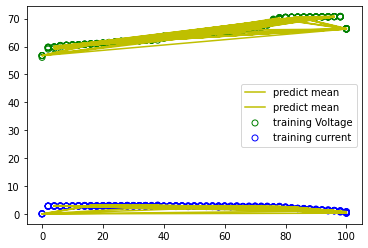

In [ ]:
# Importamos librerias necesarias para utilizar el 
# algoritmo Support Vector Classificator
#entrenamos el modelo y ploteamos los resultados
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVC


model= SVC(kernel='linear', gamma=0.1, )

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2s = r2_score(y_test,y_pred)
plt.scatter(y,X[['Voltage']], facecolor="none", edgecolor="g", label="training Voltage")
plt.scatter(y,X[['Current']], facecolor="none", edgecolor="b", label="training current")

plt.plot(y_pred, X_test, color="y", label="predict mean")


plt.legend(loc="best")
plt.show()

In [ ]:
#Metrica para medir el accuracy de la prediccion (98%)
r2s

0.988941392802925

In [ ]:
# Prediccion de prueba
preditction= model.predict(np.array([[87,3]]))

In [ ]:
preditction

array([96])

In [ ]:
#Instalar micromlgen que va ser necesario para exportarl el modelo entrenado en
# formato C para microcontroladores
!pip install micromlgen

  Created wheel for micromlgen: filename=micromlgen-1.1.23-py3-none-any.whl size=29098 sha256=8f3ad1be58bed3eff9fb5ea7ba550cdc9dd4f36ff74b3b2e08bbf286cdc5795c
  Stored in directory: /root/.cache/pip/wheels/03/c3/bc/b81eaa66a4664cd550594388499cd8140ba1a13c5986a9c407
Successfully built micromlgen


In [ ]:
#Entrenamos el modelo para exportar el modelo a un microcontrolador
#La salida de esta celda se deve copiar y guardarse en un archivo .h (por ejemplo modelo.h)
#El archivo .h debera ser llamado dentro del codigo del microcontrolador para su uso.
from micromlgen import port
if __name__ == '__main__':
    
    clf = model.fit(X_train,y_train)
    print(port(clf))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class SVM {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        float kernels[169] = { 0 };
                        float decisions[1275] = { 0 };
                        int votes[51] = { 0 };
                        kernels[0] = compute_kernel(x,   56.79  , 0.16 );
                        kernels[1] = compute_kernel(x,   59.82  , 2.94 );
                        kernels[2] = compute_kernel(x,   59.61  , 2.91 );
                        kernels[3] = compute_kernel(x,   59.84  , 2.94 );
                        kernels[4] = compute_kernel(x,   59.84  , 2.95 );
                        kernels[5] = compute_kernel(x,   59.82  , 2.94 );
                        kernels[6] = compute_kernel(x,   59.47  , 3.11 );
                        kernels[7] =

In [ ]:
#Prediccion de prueba para comparar con el modelo ya instalado en el microcontrolador [[voltaje,corriente]]
sample=np.array([[91,1]])

In [ ]:
predict=model.predict(sample)

In [ ]:
predict

array([96])